In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [26]:
matplotlib.style.use('ggplot')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10
print(matplotlib.rcParams['axes.prop_cycle'].by_key()['color'])

['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']


In [4]:
femur_stats_path = 'femur_stats.csv'
df = pd.read_csv(femur_stats_path)

In [5]:
df[(df['left'] > 0) &(df['right'] == 0)].count()

Unnamed: 0    41
left          41
right         41
dtype: int64

In [6]:
df[(df['left'] == 0) &(df['right'] > 0)].count()

Unnamed: 0    2
left          2
right         2
dtype: int64

In [7]:
df_non_empty = df[(df['left'] > 0) &(df['right'] > 0)]

In [8]:
df_non_empty.count()

Unnamed: 0    528
left          528
right         528
dtype: int64

### scans with voxel count higher than median

In [9]:
df_non_empty[(df_non_empty['left'] > df_non_empty.median(0)['left']) & (df_non_empty['right'] > df_non_empty.median(0)['right'])].count()

/tmp/ipykernel_2863351/2849806962.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_non_empty[(df_non_empty['left'] > df_non_empty.median(0)['left']) & (df_non_empty['right'] > df_non_empty.median(0)['right'])].count()


Unnamed: 0    250
left          250
right         250
dtype: int64

### scans with voxel count higher than threshold

In [10]:
voxel_threshold = 30000
df_selected = df_non_empty[(df_non_empty['left'] > voxel_threshold) & (df_non_empty['right'] > voxel_threshold)]
df_selected.count()

Unnamed: 0    465
left          465
right         465
dtype: int64

### scans with voxel count lower than threshold

In [11]:
df_non_empty[(df_non_empty['left'] < voxel_threshold) & (df_non_empty['right'] < voxel_threshold)].count()

Unnamed: 0    45
left          45
right         45
dtype: int64

In [12]:
df.count()

Unnamed: 0    1204
left          1204
right         1204
dtype: int64

In [13]:
left_alpha = [0.7 if c == 0 else 1.0 for c in df['left']]
right_alpha = [0.7 if c == 0 else 1.0 for c in df['right']]

red_rgba_colors = np.zeros((len(left_alpha),4))
# for red the first column needs to be one
red_rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
red_rgba_colors[:, 3] = left_alpha

blue_rgba_colors = np.zeros((len(right_alpha),4))
# for red the first column needs to be one
blue_rgba_colors[:,2] = 1.0
# the fourth column needs to be your alphas
blue_rgba_colors[:, 3] = right_alpha

In [14]:
def rand_jitter(arr,stdev = 0.01):
    stdev = stdev * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

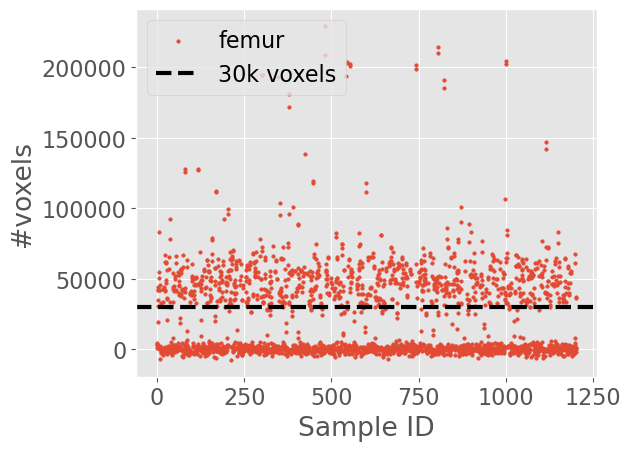

In [28]:
plt.scatter(x = range(len(df['right'])),y=rand_jitter(df['right']),label='femur',s=6,c='#E24A33')
plt.scatter(x = range(len(df['left'])),y=rand_jitter(df['left']),label='',s=6,c='#E24A33')
# plt.axhline(y=(df_non_empty.median(0)['right'] + df_non_empty.median(0)['left'])/2,linestyle='--',label='median',color='b')
plt.axhline(y=30000,linestyle='--',label='30k voxels',color='k')
plt.ylabel('#voxels')
plt.xlabel('Sample ID')
plt.legend()
plt.tight_layout()
plt.savefig('totalsegmentator_femur_voxel_plot.pdf')

### save subjects that qualify

In [26]:
df_selected['Unnamed: 0'].to_csv('subjects_30k.csv',header=None,index=False)